In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [2]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda




In [3]:
from xgboost import XGBRegressor

In [4]:
df_train = pd.read_csv("train.csv")

In [5]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test = pd.read_csv('test.csv')

In [7]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
df_train.shape

(4209, 378)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [10]:
df_train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [11]:
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df_train=df_train.drop('ID',axis=1)

In [13]:
#separate numerical and categorical data
df_num = df_train.select_dtypes(exclude=np.object)
df_cat = df_train.select_dtypes(include=np.object)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9916\3974363195.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_num = df_train.select_dtypes(exclude=np.object)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9916\3974363195.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cat = df_train.select_dtypes(include=np.object)


In [14]:
df_num.head()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_cat.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [17]:
## drop dependent variable from numerical dataset
df_num = df_num.drop('y',axis=1)
df_num.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
columns = df_num.columns

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mn = MinMaxScaler()

In [25]:
df_mn = mn.fit_transform(df_num)

In [27]:
df_sc = pd.DataFrame(df_mn, index = df_num.index, columns = df_num.columns)
df_sc.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [28]:
df_num_variance = df_num.var()

In [30]:
variable_val_zero = []
for i in range(0,len(df_num_variance)):
    if df_num_variance[i]==0:
        variable_val_zero.append(columns[i])

In [31]:
np.ravel(variable_val_zero)

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype='<U4')

In [32]:
df_num_variance_with_zero_drop = df_num.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'],axis=1)

In [34]:
df_num_variance_with_zero_drop.shape

(4209, 356)

In [36]:
df_train.shape

(4209, 377)

check for unique values in train set

In [38]:
df_train.nunique()

y       2545
X0        47
X1        27
X2        44
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 377, dtype: int64

In [39]:
## returns the unique values in the training dataset

train_feature_names = df_train[['y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48',
       'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57',
       'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66',
       'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76',
       'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85',
       'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94',
       'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103',
       'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111',
       'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119',
       'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128',
       'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136',
       'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144',
       'X145', 'X146', 'X147', 'X148', 'X150', 'X151', 'X152', 'X153',
       'X154', 'X155', 'X156', 'X157', 'X158', 'X159', 'X160', 'X161',
       'X162', 'X163', 'X164', 'X165', 'X166', 'X167', 'X168', 'X169',
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177',
       'X178', 'X179', 'X180', 'X181', 'X182', 'X183', 'X184', 'X185',
       'X186', 'X187', 'X189', 'X190', 'X191', 'X192', 'X194', 'X195',
       'X196', 'X197', 'X198', 'X199', 'X200', 'X201', 'X202', 'X203',
       'X204', 'X205', 'X206', 'X207', 'X208', 'X209', 'X210', 'X211',
       'X212', 'X213', 'X214', 'X215', 'X216', 'X217', 'X218', 'X219',
       'X220', 'X221', 'X222', 'X223', 'X224', 'X225', 'X226', 'X227',
       'X228', 'X229', 'X230', 'X231', 'X232', 'X233', 'X234', 'X235',
       'X236', 'X237', 'X238', 'X239', 'X240', 'X241', 'X242', 'X243',
       'X244', 'X245', 'X246', 'X247', 'X248', 'X249', 'X250', 'X251',
       'X252', 'X253', 'X254', 'X255', 'X256', 'X257', 'X258', 'X259',
       'X260', 'X261', 'X262', 'X263', 'X264', 'X265', 'X266', 'X267',
       'X268', 'X269', 'X270', 'X271', 'X272', 'X273', 'X274', 'X275',
       'X276', 'X277', 'X278', 'X279', 'X280', 'X281', 'X282', 'X283',
       'X284', 'X285', 'X286', 'X287', 'X288', 'X289', 'X290', 'X291',
       'X292', 'X293', 'X294', 'X295', 'X296', 'X297', 'X298', 'X299',
       'X300', 'X301', 'X302', 'X304', 'X305', 'X306', 'X307', 'X308',
       'X309', 'X310', 'X311', 'X312', 'X313', 'X314', 'X315', 'X316',
       'X317', 'X318', 'X319', 'X320', 'X321', 'X322', 'X323', 'X324',
       'X325', 'X326', 'X327', 'X328', 'X329', 'X330', 'X331', 'X332',
       'X333', 'X334', 'X335', 'X336', 'X337', 'X338', 'X339', 'X340',
       'X341', 'X342', 'X343', 'X344', 'X345', 'X346', 'X347', 'X348',
       'X349', 'X350', 'X351', 'X352', 'X353', 'X354', 'X355', 'X356',
       'X357', 'X358', 'X359', 'X360', 'X361', 'X362', 'X363', 'X364',
       'X365', 'X366', 'X367', 'X368', 'X369', 'X370', 'X371', 'X372',
       'X373', 'X374', 'X375', 'X376', 'X377', 'X378', 'X379', 'X380',
       'X382', 'X383', 'X384', 'X385']].values.ravel()
##train feature names
train_unique_values = pd.unique(train_feature_names)
train_unique_values

array([130.81, 'k', 'v', ..., 85.71, 108.77, 87.48], dtype=object)

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
ohe = OneHotEncoder(handle_unknown ='ignore')

In [46]:
df_cat_dum = ohe.fit_transform(df_cat).toarray()
column_names = ohe.get_feature_names()
column_names = np.array(column_names).ravel()
df_cat_oh = pd.DataFrame(df_cat_dum, columns=column_names)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
df_cat_oh.head()

,x0_a,x0_aa,x0_ab,x0_ac,x0_ad,x0_af,x0_ai,x0_aj,x0_ak,x0_al,...,x7_p,x7_q,x7_r,x7_s,x7_t,x7_u,x7_v,x7_w,x7_x,x7_y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
## Concatenate numerical and categorical into one dataset
df_train_final = pd.concat([df_num_variance_with_zero_drop, df_cat_oh],axis=1)

In [49]:
df_train_final.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,x7_p,x7_q,x7_r,x7_s,x7_t,x7_u,x7_v,x7_w,x7_x,x7_y
0,0,0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df_train_final.shape

(4209, 551)

Perform Dimensionality reduction

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=24)

In [52]:
x_pca = pca.fit_transform(df_train_final)

In [53]:
pca.explained_variance_ratio_

array([0.11327864, 0.07799109, 0.07358181, 0.05848106, 0.04943089,
       0.04191889, 0.03310021, 0.0282729 , 0.02515469, 0.02153505,
       0.02077602, 0.01725079, 0.01505285, 0.01435205, 0.01385206,
       0.01296764, 0.01205454, 0.01092876, 0.00984215, 0.00913176,
       0.00883412, 0.00843746, 0.00822975, 0.0077273 ])

In [54]:
1 - pca.explained_variance_ratio_.sum()

0.30781749402740444

In [55]:
## choosing the right number of dimensions

pca = PCA()
pca.fit(df_train_final)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [56]:
d

136

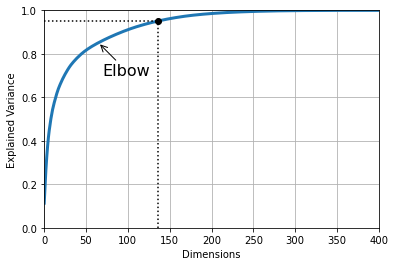

In [57]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [58]:
pca = PCA(n_components=136)

In [59]:
x_pca = pca.fit_transform(df_train_final)

In [60]:
pca.explained_variance_ratio_

array([0.11327864, 0.07799109, 0.07358181, 0.05848106, 0.04943089,
       0.04191889, 0.03310021, 0.0282729 , 0.02515469, 0.02153505,
       0.02077602, 0.01725079, 0.01505285, 0.01435206, 0.01385206,
       0.01296764, 0.01205455, 0.01092876, 0.00984218, 0.00913215,
       0.00883422, 0.0084378 , 0.00823221, 0.00772747, 0.00743423,
       0.00697398, 0.00693436, 0.00657264, 0.00638708, 0.00629629,
       0.00576382, 0.00554613, 0.0052066 , 0.0048151 , 0.004741  ,
       0.00442392, 0.00436865, 0.00419933, 0.00410023, 0.00404169,
       0.00378884, 0.00377674, 0.00371885, 0.0035104 , 0.00347096,
       0.00334591, 0.003219  , 0.00313438, 0.00301544, 0.00291733,
       0.00275398, 0.0027179 , 0.00267479, 0.00258178, 0.00252449,
       0.00244262, 0.00240755, 0.00238735, 0.00228916, 0.00225371,
       0.0022189 , 0.00217375, 0.00213442, 0.00208823, 0.00205361,
       0.00204264, 0.00201963, 0.00198619, 0.0019692 , 0.0019584 ,
       0.00194517, 0.00192554, 0.00189726, 0.00187971, 0.00185

In [62]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [63]:
df_test.isnull().sum()

ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

In [64]:
df_test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [67]:
## returns the unique values in the training dataset

test_feature_names = df_test[['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30',
       'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48',
       'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57',
       'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66',
       'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76',
       'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85',
       'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94',
       'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103',
       'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111',
       'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119',
       'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128',
       'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136',
       'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144',
       'X145', 'X146', 'X147', 'X148', 'X150', 'X151', 'X152', 'X153',
       'X154', 'X155', 'X156', 'X157', 'X158', 'X159', 'X160', 'X161',
       'X162', 'X163', 'X164', 'X165', 'X166', 'X167', 'X168', 'X169',
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177',
       'X178', 'X179', 'X180', 'X181', 'X182', 'X183', 'X184', 'X185',
       'X186', 'X187', 'X189', 'X190', 'X191', 'X192', 'X194', 'X195',
       'X196', 'X197', 'X198', 'X199', 'X200', 'X201', 'X202', 'X203',
       'X204', 'X205', 'X206', 'X207', 'X208', 'X209', 'X210', 'X211',
       'X212', 'X213', 'X214', 'X215', 'X216', 'X217', 'X218', 'X219',
       'X220', 'X221', 'X222', 'X223', 'X224', 'X225', 'X226', 'X227',
       'X228', 'X229', 'X230', 'X231', 'X232', 'X233', 'X234', 'X235',
       'X236', 'X237', 'X238', 'X239', 'X240', 'X241', 'X242', 'X243',
       'X244', 'X245', 'X246', 'X247', 'X248', 'X249', 'X250', 'X251',
       'X252', 'X253', 'X254', 'X255', 'X256', 'X257', 'X258', 'X259',
       'X260', 'X261', 'X262', 'X263', 'X264', 'X265', 'X266', 'X267',
       'X268', 'X269', 'X270', 'X271', 'X272', 'X273', 'X274', 'X275',
       'X276', 'X277', 'X278', 'X279', 'X280', 'X281', 'X282', 'X283',
       'X284', 'X285', 'X286', 'X287', 'X288', 'X289', 'X290', 'X291',
       'X292', 'X293', 'X294', 'X295', 'X296', 'X297', 'X298', 'X299',
       'X300', 'X301', 'X302', 'X304', 'X305', 'X306', 'X307', 'X308',
       'X309', 'X310', 'X311', 'X312', 'X313', 'X314', 'X315', 'X316',
       'X317', 'X318', 'X319', 'X320', 'X321', 'X322', 'X323', 'X324',
       'X325', 'X326', 'X327', 'X328', 'X329', 'X330', 'X331', 'X332',
       'X333', 'X334', 'X335', 'X336', 'X337', 'X338', 'X339', 'X340',
       'X341', 'X342', 'X343', 'X344', 'X345', 'X346', 'X347', 'X348',
       'X349', 'X350', 'X351', 'X352', 'X353', 'X354', 'X355', 'X356',
       'X357', 'X358', 'X359', 'X360', 'X361', 'X362', 'X363', 'X364',
       'X365', 'X366', 'X367', 'X368', 'X369', 'X370', 'X371', 'X372',
       'X373', 'X374', 'X375', 'X376', 'X377', 'X378', 'X379', 'X380',
       'X382', 'X383', 'X384', 'X385']].values.ravel()
##train feature names
test_unique_values = pd.unique(test_feature_names)
test_unique_values

array([1, 'az', 'v', ..., 8413, 8414, 8416], dtype=object)

In [68]:
## separate numerical and categorical data from test dataset

df_num_test = df_test.select_dtypes(exclude = np.object)
df_cat_test = df_test.select_dtypes(include = np.object)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9916\920824870.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_num_test = df_test.select_dtypes(exclude = np.object)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9916\920824870.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cat_test = df_test.select_dtypes(include = np.object)


In [77]:
df_num_test = df_num_test.drop("ID",axis = 1)
df_num_test.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [78]:
df_num_test.shape

(4209, 368)

In [79]:
test_columns = df_num_test.columns
test_columns

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

In [83]:
test_df_num_sc = mn.transform(df_num_test)
test_df_num_df = pd.DataFrame(test_df_num_sc, index = df_num_test.index, columns=df_num_test.columns)
test_df_num_df.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
test_variance_num_df=df_num_test.var()

In [87]:
test_variable_val_zero = []
for i in range(0,len(test_variance_num_df)):
    if test_variance_num_df[i]==0:
        test_variable_val_zero.append(test_columns[i])

In [88]:
np.ravel(test_variable_val_zero)

array(['X257', 'X258', 'X295', 'X296', 'X369'], dtype='<U4')

In [89]:
test_variable_val_zero_with_drop = df_num_test.drop(['X257', 'X258', 'X295', 'X296', 'X369'],axis=1)

In [90]:
test_variable_val_zero_with_drop.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [93]:
test_df_cat_dum = ohe.transform(df_cat_test).toarray()
test_column_names = ohe.get_feature_names()
test_column_names = np.array(test_column_names).ravel()
test_cat_oh = pd.DataFrame(test_df_cat_dum, columns = test_column_names)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [96]:
## Concatenate both categorical and numerical test dataset

df_test_final = pd.concat([test_variable_val_zero_with_drop, test_cat_oh], axis=1)

In [97]:
df_test_final.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,x7_p,x7_q,x7_r,x7_s,x7_t,x7_u,x7_v,x7_w,x7_x,x7_y
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
print(df_train_final.shape)
print(df_test_final.shape)

(4209, 551)
(4209, 558)


In [101]:
# while dropping columns with 0 variance for train and test data sets feature results are different, 
# hence to balance the feature in train and test sets, added dropped dummy columns with NAN values to apply PCA
# reset the test data features to align with train features
test_df_newdata = df_test_final.reindex(labels=df_train_final.columns,axis=1)
test_df_newdata.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,x7_p,x7_q,x7_r,x7_s,x7_t,x7_u,x7_v,x7_w,x7_x,x7_y
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
test_df_newdata.isnull().values.any()

True

In [106]:
test_df_newdata.columns[test_df_newdata.isnull().any()].tolist()

['X257', 'X258', 'X295', 'X296', 'X369']

In [107]:
test_df_newdata["X257"] = test_df_newdata["X257"].fillna(0)
test_df_newdata["X258"] = test_df_newdata["X258"].fillna(0)
test_df_newdata["X295"] = test_df_newdata["X295"].fillna(0)
test_df_newdata["X296"] = test_df_newdata["X296"].fillna(0)
test_df_newdata["X369"] = test_df_newdata["X369"].fillna(0)
test_df_newdata.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,x7_p,x7_q,x7_r,x7_s,x7_t,x7_u,x7_v,x7_w,x7_x,x7_y
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Apply PCA for test dataset

In [108]:
test_x_pca = pca.transform(test_df_newdata)

In [109]:
# X_train and y Values of train data set
X_train = df_train_final
y_train = df_train['y']

In [110]:
# X_test values of test data set
X_test = test_df_newdata

Predict your test_df values using XGBoost.

In [111]:
xgb = XGBRegressor()

In [113]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [115]:
pred = xgb.predict(X_test)

In [116]:
pred

array([ 95.92638, 112.90855,  99.74303, ...,  96.50017, 107.51481,
        90.8429 ], dtype=float32)

In [117]:
df_res = pd.DataFrame(pred, columns = ["yHat"])
df_res

,yHat
0,95.926376
1,112.908546
2,99.743027
3,79.599861
4,112.196259
...,...
4204,107.167992
4205,90.772079
4206,96.500168
4207,107.514809
